In [1]:
!pip install spacy


In [2]:
!pip install PyPDF2



In [3]:
!pip install python-docx


In [4]:
!pip install docx2txt


In [5]:
# import os
# import pandas as pd
# import textract

# # Define the base directory containing the resumes
# base_dir = 'resumes categorised'

# # Initialize a list to store the data
# data = []

# def read_text(file):
#     try:
#         text = textract.process(file)
#         return text.decode('utf-8')
#     except Exception as e:
#         print(f'Error extracting text from {file}: {e}')
#         return None

# # Walk through the directory structure
# for root, dirs, files in os.walk(base_dir):
#     for file_name in files:
#         # Print the file name for debugging purposes
#         print(f'Processing file: {file_name}')
        
#         # Extract the category from the folder name
#         category = os.path.basename(root)
        
#         # Handle different file types
#         file_path = os.path.join(root, file_name)
#         if file_name.endswith('.docx') or file_name.endswith('.doc'):
#             content = read_text(file_path)
#         elif file_name.endswith('.pdf'):
#             content = read_text(file_path)
#         else:
#             print(f'Skipping file: {file_name} (unsupported format)')
#             continue
        
#         if content is not None:
#             data.append({'Resume': content, 'Category': category})
#             print(f'Read file {file_name} with category {category}')
#         else:
#             print(f'Failed to read file {file_name}. Content is None.')


In [7]:
import os
import pandas as pd
from PyPDF2 import PdfReader
from docx import Document
import docx2txt

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

def extract_text_from_docx(docx_path):
    try:
        doc = Document(docx_path)
        text = ""
        for paragraph in doc.paragraphs:
            text += paragraph.text + "\n"
        return text
    except Exception as e:
        print(f"Error extracting text from {docx_path}: {e}")
        return ""

def extract_text_from_doc(doc_path):
    try:
        text = docx2txt.process(doc_path)
        return text
    except Exception as e:
        print(f"Error extracting text from {doc_path}: {e}")
        return ""

def create_dataframe_from_files(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith('.pdf'):
            text = extract_text_from_pdf(file_path)
        elif filename.endswith('.docx'):
            text = extract_text_from_docx(file_path)
        elif filename.endswith('.doc'):
            text = extract_text_from_doc(file_path)
        else:
            continue
        data.append({'Filename': filename, 'Text': text})
    df = pd.DataFrame(data)
    return df

folder_path = 'D:\datascience\project 2 NLP'

df = create_dataframe_from_files(folder_path)





#you have to edit only 2nd last line of folder path

Error extracting text from D:\datascience\project 2 NLP\Hari Krishna M_Hexaware.doc: "There is no item named 'word/document.xml' in the archive"
Error extracting text from D:\datascience\project 2 NLP\Harikrishna Akula_Hexaware.doc: "There is no item named 'word/document.xml' in the archive"
Error extracting text from D:\datascience\project 2 NLP\Hima Mendu_Hexaware.doc: "There is no item named 'word/document.xml' in the archive"
Error extracting text from D:\datascience\project 2 NLP\J. Sumanth Royal_Hexaware.doc: "There is no item named 'word/document.xml' in the archive"
Error extracting text from D:\datascience\project 2 NLP\Madeeswar A_Hexaware.doc: "There is no item named 'word/document.xml' in the archive"
Error extracting text from D:\datascience\project 2 NLP\Naresh Babu Cherukuri_Hexaware.doc: "There is no item named 'word/document.xml' in the archive"
Error extracting text from D:\datascience\project 2 NLP\Nazeer Basha.doc: "There is no item named 'word/document.xml' in the 

In [8]:
df

Filename  \
0                    Anil kumar.docx   
1         AradhanaTripathi[4_0].docx   
2                  Buddha Vamsi.docx   
3   ChinnaSubbarayuduM_Hexaware.docx   
4         Gopi Krishna_Hexaware.docx   
..                               ...   
75             SSKumar_Hexaware.docx   
76         Tatikonda Kiran Kumar.doc   
77      Venkateswarlu B_Hexaware.doc   
78         Vinay Kumar_Hexaware.docx   
79                      Vinod B.docx   

                                                 Text  
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...  
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...  
2   BUDDHA VAMSI                                  ...  
3   Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  
4   \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  
..                                                ...  
75  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  
76                                                     
77                                                     
78                                                ...  
79  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...  

[80 rows x 2 columns]

In [9]:
df.to_csv('Resume_classification.csv', index=False)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy 



In [11]:
df=pd.read_csv('Resume_classification.csv')

In [12]:
df

Filename  \
0                    Anil kumar.docx   
1         AradhanaTripathi[4_0].docx   
2                  Buddha Vamsi.docx   
3   ChinnaSubbarayuduM_Hexaware.docx   
4         Gopi Krishna_Hexaware.docx   
..                               ...   
75             SSKumar_Hexaware.docx   
76         Tatikonda Kiran Kumar.doc   
77      Venkateswarlu B_Hexaware.doc   
78         Vinay Kumar_Hexaware.docx   
79                      Vinod B.docx   

                                                 Text  
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...  
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...  
2   BUDDHA VAMSI                                  ...  
3   Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  
4   \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  
..                                                ...  
75  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  
76                                                NaN  
77                                                NaN  
78                                                ...  
79  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...  

[80 rows x 2 columns]

In [13]:
df.isna().sum()

Filename     0
Text        26
dtype: int64

In [14]:
df.dropna(subset=['Text'],inplace = True)

In [15]:
df.isna().sum()

Filename    0
Text        0
dtype: int64

In [16]:
df.shape

(54, 2)

In [17]:
f=" tgfd "

In [18]:
f=f.strip()

In [19]:
f

'tgfd'

In [20]:
df=[Text.strip() for Text in df.Text]
df=[Text for Text in df if Text]
df[0:10]

['ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Developer   \n\n\t\n\nSummary\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\nUsed containers such as for each loop 

In [21]:
len(df)

54

In [22]:
#joining the list into one string/text

text=' '.join(df)
text

'ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Developer   \n\n\t\n\nSummary\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\nUsed containers such as for each loop c

In [23]:
len(text)

212558

In [24]:
t='ki!#p2q%'
to_remove=['!','#','%']
for each in to_remove:
    t=t.replace(each,'')
    t

In [25]:
import string

In [26]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))

In [27]:
no_punc_text

'ANIL KUMAR MADDUKURI  \t\t\nSQL  MSBI Developer   \n\n\t\n\nSummary\n\n24 years of experience in MS SQL Server SSMS and creating SSIS packages SSRS Reports by using Microsoft Business Intelligence MSBI tools\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables\nHandled data manipulation and data consistency by creating Views Triggers and Synonyms\nHands on experience in creation optimization and debugging Stored Procedure and Functions\nFamiliar in writing queries using CTE Temporary Tables and Table Variables\nGood experience in using Set Operators like Union Union All Except and Intersect to assist required data\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions Windows Functions and String Functions\nWorked extensively on Data Extraction Transformation and Loading ETL process in SQL Server Integration Services\nUsed containers such as for each loop container and sequence con

In [28]:
import nltk #natural language tool kit
# nltk.download('punkt')

In [29]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:10])

['ANIL', 'KUMAR', 'MADDUKURI', 'SQL', 'MSBI', 'Developer', 'Summary', '24', 'years', 'of']


In [30]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['ANIL', 'KUMAR', 'MADDUKURI', 'SQL', 'MSBI', 'Developer', 'Summary', '24', 'years', 'experience', 'MS', 'SQL', 'Server', 'SSMS', 'creating', 'SSIS', 'packages', 'SSRS', 'Reports', 'using', 'Microsoft', 'Business', 'Intelligence', 'MSBI', 'tools', 'Expertise', 'various', 'types', 'Joins', 'Sub', 'Queries', 'writing', 'complex', 'queries', 'involving', 'multiple', 'tables', 'Handled', 'data', 'manipulation']


In [31]:
len(no_stop_tokens)

21674

In [32]:
##normalize the data convert everything to lowercase

In [33]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['anil', 'kumar', 'maddukuri', 'sql', 'msbi', 'developer', 'summary', '24', 'years', 'experience', 'ms', 'sql', 'server', 'ssms', 'creating', 'ssis', 'packages', 'ssrs', 'reports', 'using', 'microsoft', 'business', 'intelligence', 'msbi', 'tools']


In [34]:
#stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:20])

['anil', 'kumar', 'maddukuri', 'sql', 'msbi', 'develop', 'summari', '24', 'year', 'experi', 'ms', 'sql', 'server', 'ssm', 'creat', 'ssi', 'packag', 'ssr', 'report', 'use']


In [35]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

In [36]:
# !pip install spacy

In [37]:
import spacy

In [38]:
##NLP english language model of spacy library
nlp=spacy.load('en_core_web_sm')


In [39]:
#lemmas being one of them but mostly POS which will follow later

doc=nlp(' '.join(lower_words))
print(doc[0:40])

lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])
len(lemmas)

anil kumar maddukuri sql msbi developer summary 24 years experience ms sql server ssms creating ssis packages ssrs reports using microsoft business intelligence msbi tools expertise various types joins sub queries writing complex queries involving multiple tables handled data manipulation
['anil', 'kumar', 'maddukuri', 'sql', 'msbi', 'developer', 'summary', '24', 'year', 'experience', 'ms', 'sql', 'server', 'ssm', 'create', 'ssis', 'package', 'ssrs', 'report', 'use', 'microsoft', 'business', 'intelligence', 'msbi', 'tool']


21704

In [40]:
#featiure  extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [41]:
len(vectorizer.vocabulary_)

3079

In [42]:
vectorizer.vocabulary_

{'anil': 313,
 'kumar': 1583,
 'maddukuri': 1660,
 'sql': 2590,
 'msbi': 1813,
 'developer': 899,
 'summary': 2686,
 '24': 99,
 'year': 3068,
 'experience': 1100,
 'ms': 1812,
 'server': 2476,
 'ssm': 2609,
 'create': 753,
 'ssis': 2605,
 'package': 1983,
 'ssrs': 2613,
 'report': 2330,
 'use': 2908,
 'microsoft': 1754,
 'business': 534,
 'intelligence': 1467,
 'tool': 2814,
 'expertise': 1104,
 'various': 2928,
 'type': 2866,
 'join': 1531,
 'sub': 2661,
 'query': 2237,
 'write': 3058,
 'complex': 661,
 'involve': 1498,
 'multiple': 1820,
 'table': 2719,
 'handle': 1291,
 'data': 817,
 'manipulation': 1686,
 'datum': 820,
 'consistency': 697,
 'view': 2953,
 'trigger': 2849,
 'synonyms': 2712,
 'hand': 1289,
 'creation': 756,
 'optimization': 1942,
 'debug': 835,
 'store': 2645,
 'procedure': 2151,
 'function': 1209,
 'familiar': 1129,
 'writing': 3060,
 'cte': 785,
 'temporary': 2764,
 'variable': 2927,
 'good': 1250,
 'set': 2488,
 'operator': 1937,
 'like': 1620,
 'union': 2883,
 '

In [43]:
li=vectorizer.vocabulary_.keys()

In [44]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T


0
anil           313
kumar         1583
maddukuri     1660
sql           2590
msbi          1813
...            ...
reassessment  2275
nano          1843
populate      2092
constraints    701
emailer       1015

[3079 rows x 1 columns]

In [45]:
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names_out()[50:100])
print(x.toarray()[50:100])
print(x.toarray().shape)

{'anil': 313, 'kumar': 1583, 'maddukuri': 1660, 'sql': 2590, 'msbi': 1813, 'developer': 899, 'summary': 2686, '24': 99, 'year': 3068, 'experience': 1100, 'ms': 1812, 'server': 2476, 'ssm': 2609, 'create': 753, 'ssis': 2605, 'package': 1983, 'ssrs': 2613, 'report': 2330, 'use': 2908, 'microsoft': 1754, 'business': 534, 'intelligence': 1467, 'tool': 2814, 'expertise': 1104, 'various': 2928, 'type': 2866, 'join': 1531, 'sub': 2661, 'query': 2237, 'write': 3058, 'complex': 661, 'involve': 1498, 'multiple': 1820, 'table': 2719, 'handle': 1291, 'data': 817, 'manipulation': 1686, 'datum': 820, 'consistency': 697, 'view': 2953, 'trigger': 2849, 'synonyms': 2712, 'hand': 1289, 'creation': 756, 'optimization': 1942, 'debug': 835, 'store': 2645, 'procedure': 2151, 'function': 1209, 'familiar': 1129, 'writing': 3060, 'cte': 785, 'temporary': 2764, 'variable': 2927, 'good': 1250, 'set': 2488, 'operator': 1937, 'like': 1620, 'union': 2883, 'all': 280, 'except': 1084, 'intersect': 1489, 'assist': 377

lets see how bigrams and trigrams can be included here

In [46]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(3,3),max_features=100)
box_matrix_ngram=vectorizer_ngram_range.fit_transform(df)

In [47]:
box_matrix_ngram

<54x100 sparse matrix of type '<class 'numpy.int64'>'
	with 740 stored elements in Compressed Sparse Row format>

In [48]:
print(vectorizer_ngram_range.get_feature_names_out())
print(box_matrix_ngram.toarray())

['2018 to till' '2019 to till' 'ability to work'
 'and document transformation' 'and process scheduler'
 'and production using' 'and tax updates' 'application engine programs'
 'application server domains' 'application server web'
 'application servers web' 'as per business' 'as per the' 'as react js'
 'as software engineer' 'as well as' 'as workday consultant'
 'balancing of application' 'best of my' 'between various environments'
 'code to implement' 'compare reports between' 'currently working as'
 'day to day' 'declaration hereby declare' 'declare that all'
 'declare that the' 'domains process scheduler' 'engine programs to'
 'experience in creating' 'experience in developing'
 'experience in migrating' 'experience in peoplesoft'
 'experience in using' 'good experience in' 'good knowledge in'
 'good knowledge on' 'hands on experience' 'having years of'
 'hereby declare that' 'html5 css3 javascript' 'in migrating the'
 'in workday hcm' 'inbound and outbound' 'is true to'
 'js compon

TFidf vectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(2,3), max_features=10)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(df)

In [50]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.3127595  0.07387713 0.1509157  0.         0.
  0.         0.93216154 0.07087295 0.        ]
 [0.         0.31638315 0.07473307 0.         0.07169408 0.
  0.         0.94296163 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.45667114 0.25888941 0.79328633 0.         0.
  0.         0.         0.12418089 0.28231837]
 [0.57870905 0.17888125 0.         0.51789291 0.24321258 0.
  0.         0.         0.         0.55293029]
 [0.38637544 0.71658101 0.16926407 0.3457715  0.16238102 0.
  0.         0.         0.16238102 0.36916423]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.72162686 0.         0.         0.
  0.         0.         0.69228223 0.        ]
 [0.         0.82111607 0.         0.47545531 0.22328306 0.
  0.         0.         0.22328306 0.        ]
 [0.         0.35906092 0.12722102 0.

In [51]:
!pip install wordcloud

In [52]:
##generate wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [53]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

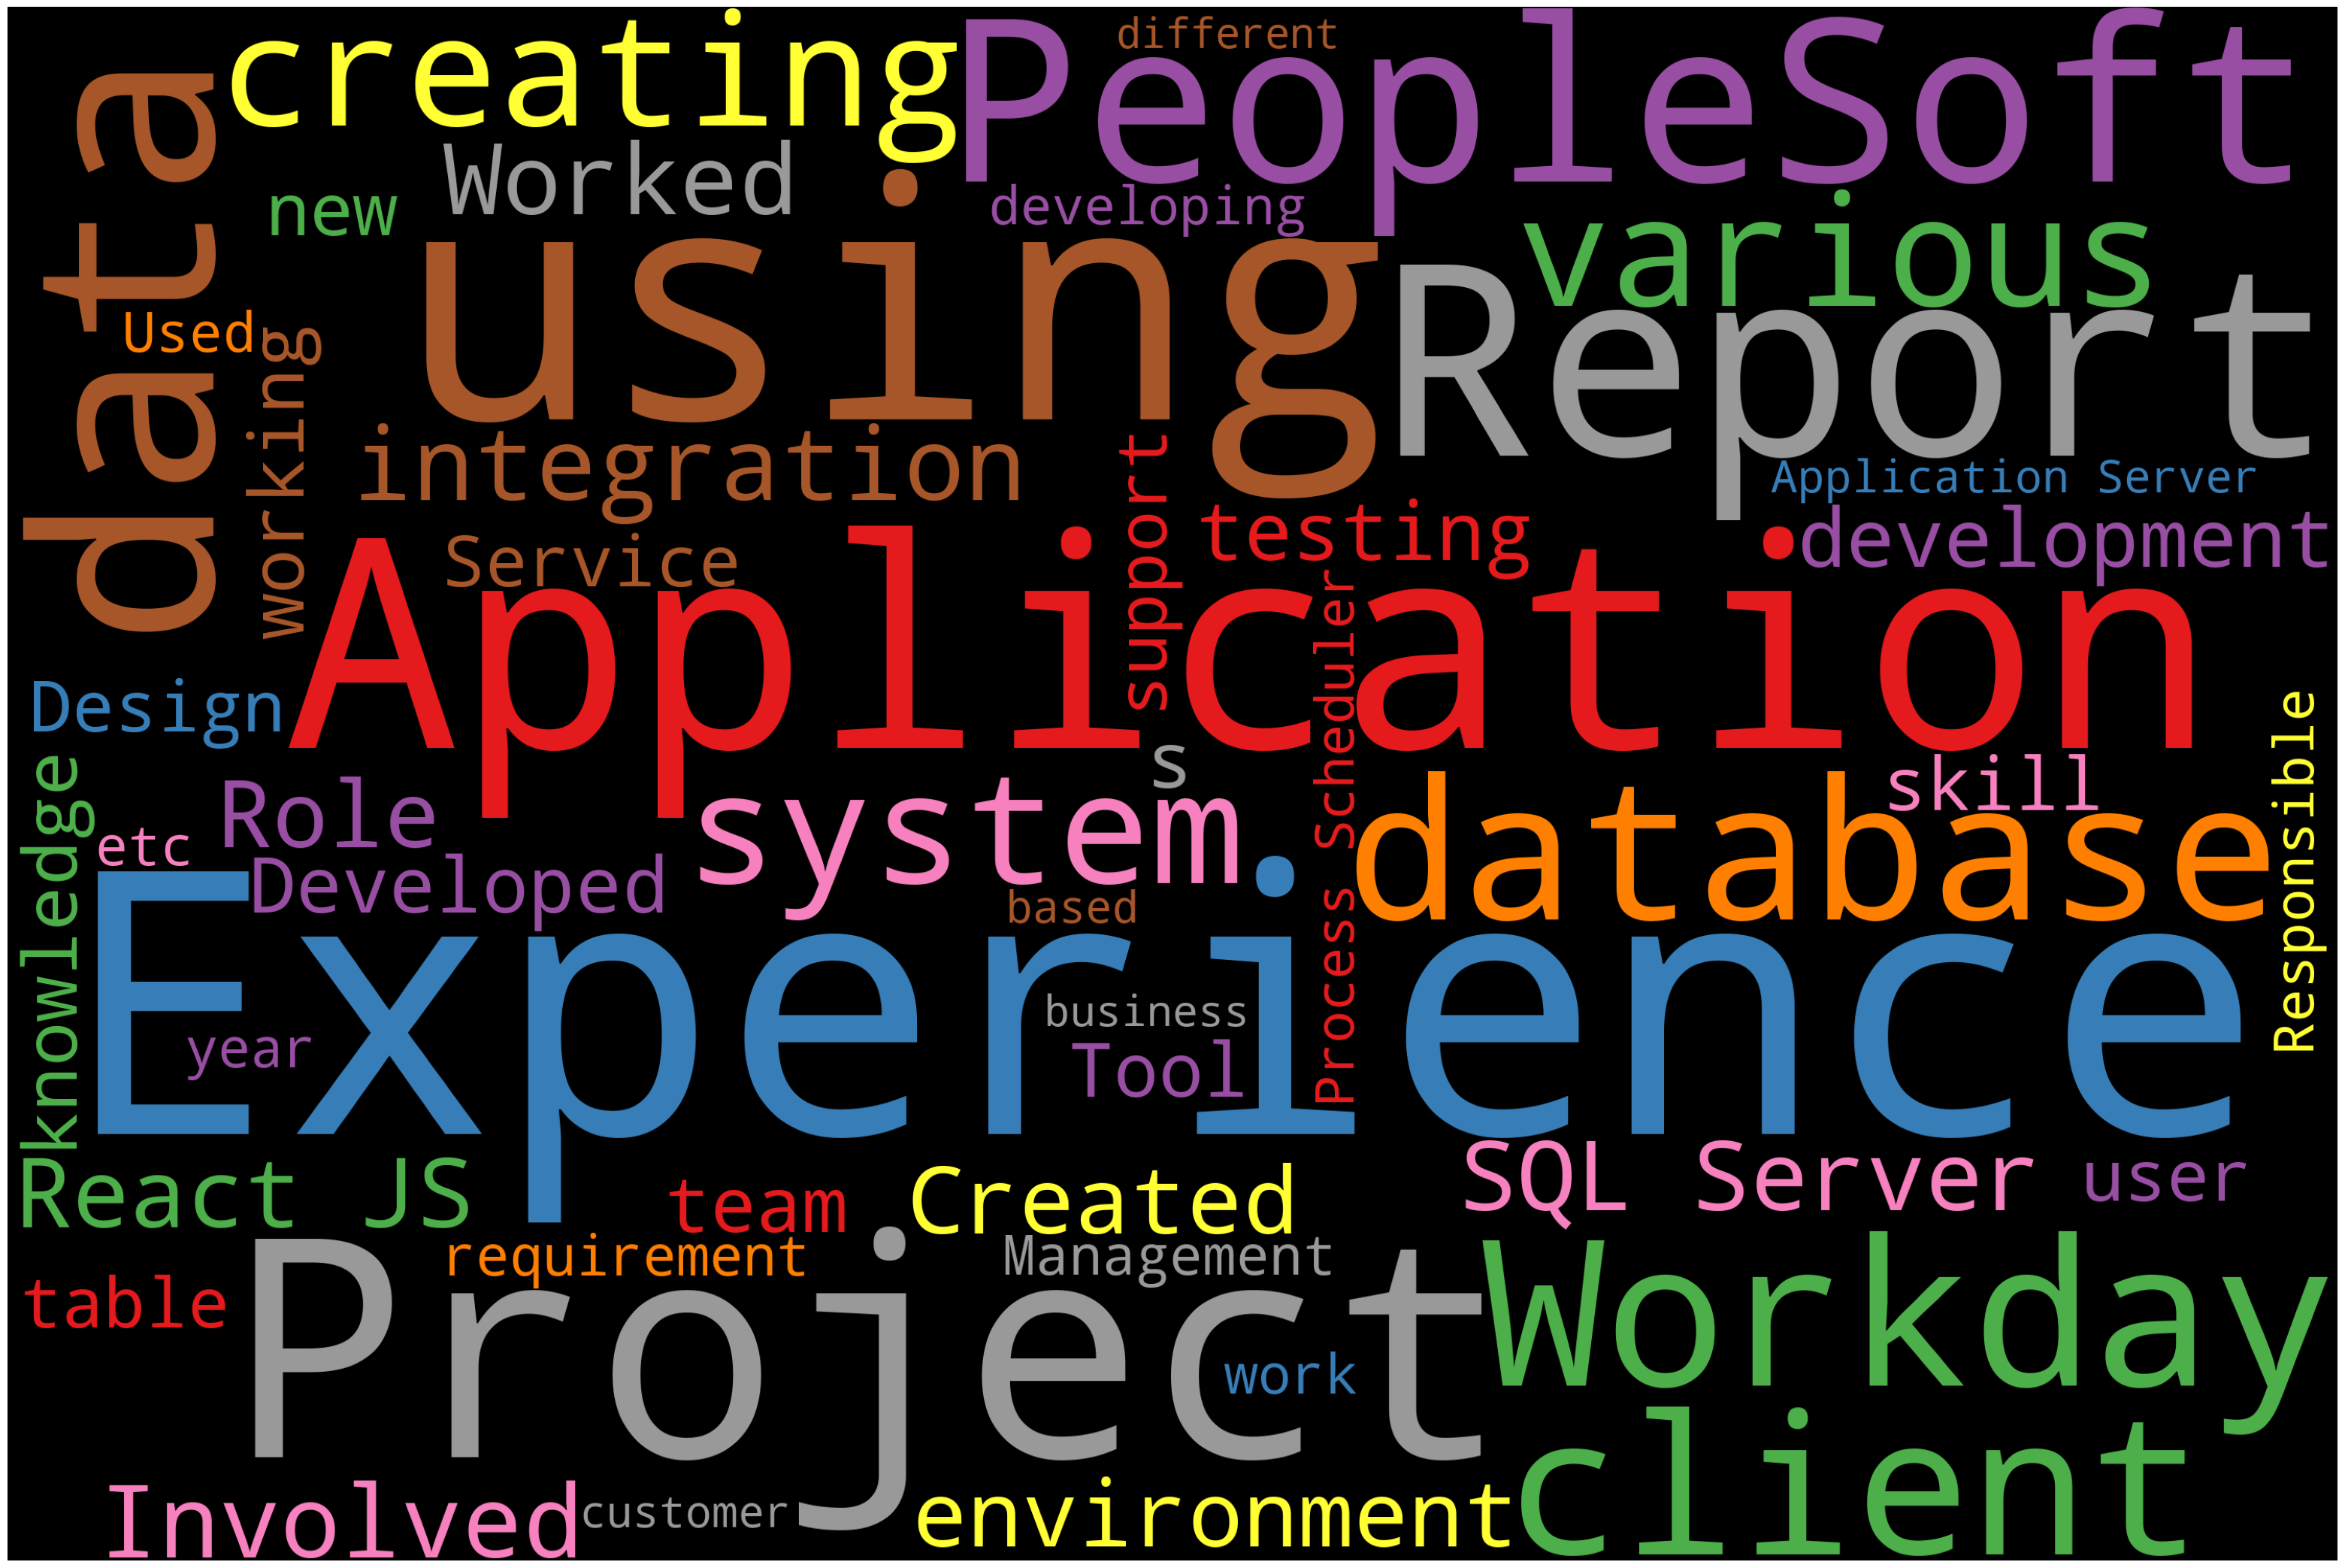

In [54]:
##generate wordcloud

wordcloud=WordCloud(width=3000, height=2000, background_color='black', max_words=50, colormap='Set1').generate(text)
plot_cloud(wordcloud)

In [55]:
##Entity tagging
# Parts Of Speech  Tagging
nlp=spacy.load('en_core_web_sm')

one_block=text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [56]:
one_block


'ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Developer   \n\n\t\n\nSummary\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\nUsed containers such as for each loop c

In [57]:
for token in doc_block[100:200]:
    print(token,token.pos_)

Variables PROPN
. PUNCT

 SPACE
Good ADJ
experience NOUN
in ADP
using VERB
Set PROPN
Operators PROPN
like ADP
Union PROPN
, PUNCT
Union PROPN
All PROPN
, PUNCT
Except SCONJ
and CCONJ
Intersect ADJ
to PART
assist VERB
required ADJ
data NOUN
. PUNCT

 SPACE
Experience NOUN
in ADP
manipulate NOUN
the DET
data NOUN
from ADP
multiple ADJ
table NOUN
and CCONJ
report VERB
to ADP
the DET
client NOUN
using VERB
Aggregate PROPN
Functions PROPN
, PUNCT
Windows PROPN
Functions PROPN
and CCONJ
String PROPN
Functions PROPN
. PUNCT

 SPACE
Worked VERB
extensively ADV
on ADP
Data PROPN
Extraction PROPN
, PUNCT
Transformation PROPN
and CCONJ
Loading PROPN
( PUNCT
ETL PROPN
) PUNCT
process NOUN
in ADP
SQL PROPN
Server PROPN
Integration PROPN
Services PROPN
. PUNCT

 SPACE
Used VERB
containers NOUN
such ADJ
as ADP
for ADP
each DET
loop NOUN
container NOUN
and CCONJ
sequence NOUN
container NOUN
to PART
load VERB
the DET
data NOUN
from ADP
multiple ADJ
source NOUN
file NOUN
to ADP
Database PROPN
tables NOU

In [58]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['report', 'manager', 'level', 'performing', 'backup', 'restore', 'database', 'improve', 'performance', 'Languages', 'ETL', 'Tools', 'Reporting', 'working', 'date', 'Duration', 'Description', 'project', 'developed', 'managed', 'health', 'care', 'company', 'sells', 'consumer', 'directed', 'health', 'care', 'insurance', 'services', 'term', 'care', 'disability', 'plans', 'employer', 'paid', 'insurance', 'benefit', 'programs', 'goal', 'project', 'mechanism', 'revert', 'data', 'database', 'Responsibilities', 'Create', 'update', 'indexes', 'views', 'user', 'defined', 'functions', 'table', 'expressions', 'CTEs', 'extracting', 'data', 'sources', 'file', 'Text', 'load', 'staging', 'area', 'Use', 'transformations', 'Aggregate', 'Derived', 'Changing', 'manipulate', 'data', 'data', 'flow', 'level', 'event', 'handlers', 'packages', 'maintain', 'log', 'information', 'provide', 'checkpoints', 'level', 'Design', 'packages', 'control', 'flow', 'levels', 'based', 'tasks', 'tasks', 'used', 'reports', 'fo

In [59]:
 #Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']
wf_df[0:10] # viewing top ten results

word  count
0   experience    288
1        using    247
2         data    119
3     business    116
4     involved     99
5  application     99
6      reports     94
7    knowledge     92
8     creating     91
9       worked     90

<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

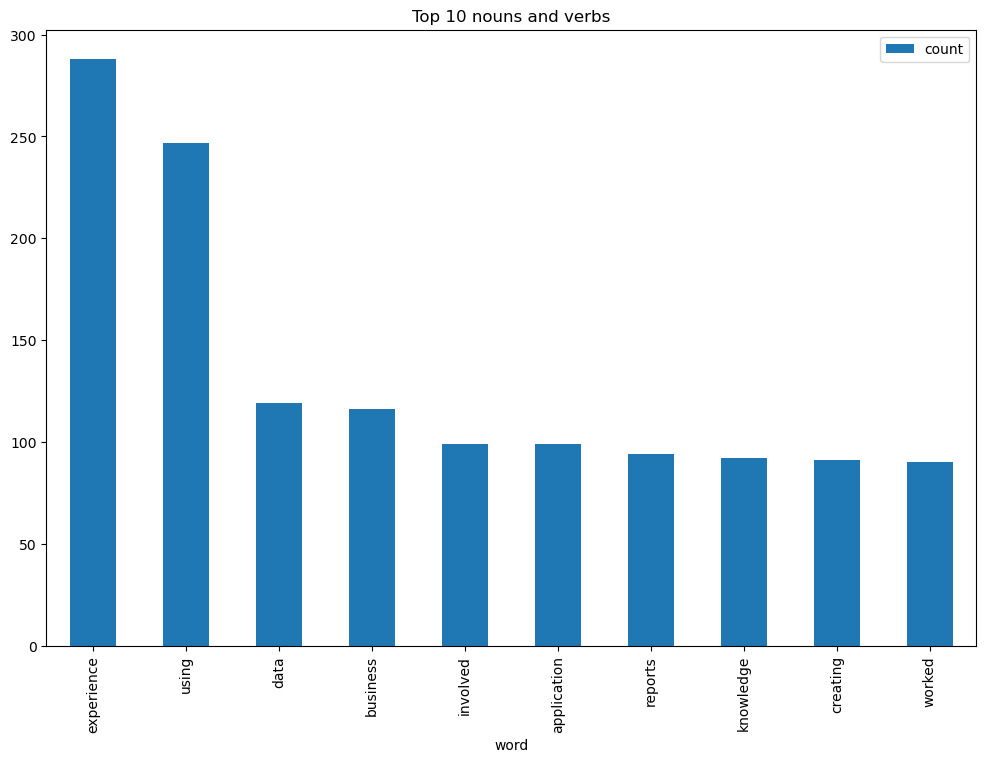

In [60]:
# Visualizing results 
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

Emotion mining - seniment analysis

In [61]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

['ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Developer   \n\n\t\n\nSummary\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.',
 'Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.',
 'Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms.',
 'Hands on experience in creation, optimization and debugging Stored Procedure and Functions.',
 'Familiar in writing queries using CTE, Temporary Tables and Table Variables.',
 'Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.',
 'Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.',
 'Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.',
 'Used container

In [62]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...
1     Expertise in various types of Joins and Sub Qu...
2     Handled data manipulation and data consistency...
3     Hands on experience in creation, optimization ...
4     Familiar in writing queries using CTE, Tempora...
...                                                 ...
1689  Responsible for writing complex SQL Queries, J...
1690  Experience in creating different types of Repo...
1691  Involved in deploying and scheduling the repor...
1692  Involved in scheduling the Stored procedures t...
1693                                     B. Vinod kumar

[1694 rows x 1 columns]

In [63]:
wf_df

word  count
0     experience    288
1          using    247
2           data    119
3       business    116
4       involved     99
...          ...    ...
1806     centres      1
1807   enrolling      1
1808      passed      1
1809   placement      1
1810  dimensions      1

[1811 rows x 2 columns]

In [64]:
scores = wf_df.set_index('word')['count'].to_dict() 
scores

{'experience': 288,
 'using': 247,
 'data': 119,
 'business': 116,
 'involved': 99,
 'application': 99,
 'reports': 94,
 'knowledge': 92,
 'creating': 91,
 'worked': 90,
 'working': 89,
 'web': 88,
 'system': 75,
 'used': 74,
 'created': 71,
 'process': 67,
 'support': 67,
 'responsibilities': 66,
 'skills': 66,
 'developed': 61,
 'integrations': 61,
 'work': 59,
 'issues': 56,
 'years': 55,
 'requirement': 55,
 'team': 54,
 'design': 52,
 'client': 51,
 'project': 51,
 'end': 51,
 'information': 47,
 'development': 47,
 'server': 47,
 'developing': 46,
 'user': 46,
 'database': 45,
 'based': 45,
 'testing': 43,
 'security': 43,
 'tools': 41,
 'having': 41,
 'requirements': 41,
 'fields': 40,
 'production': 39,
 'components': 39,
 'servers': 38,
 'services': 37,
 'reporting': 36,
 'applications': 36,
 'load': 35,
 'day': 35,
 'integration': 35,
 'queries': 34,
 'custom': 34,
 'date': 33,
 'create': 32,
 'code': 32,
 'tables': 31,
 'maintenance': 31,
 'implementation': 31,
 'test': 31,


In [65]:
sentiment_lexicon = scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [66]:
#test that it works
calculate_sentiment(text = 'amazing')

0

In [67]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 
sent_df

sentence  sentiment_value
0     ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...              364
1     Expertise in various types of Joins and Sub Qu...               44
2     Handled data manipulation and data consistency...              282
3     Hands on experience in creation, optimization ...              316
4     Familiar in writing queries using CTE, Tempora...               27
...                                                 ...              ...
1689  Responsible for writing complex SQL Queries, J...              149
1690  Experience in creating different types of Repo...              434
1691  Involved in deploying and scheduling the repor...               42
1692  Involved in scheduling the Stored procedures t...               57
1693                                     B. Vinod kumar                1

[1694 rows x 2 columns]

In [68]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    30
1    16
2    12
3    12
4    11
5    17
6    21
7    15
8    22
9    38
Name: word_count, dtype: int64

In [69]:
sent_df.sort_values(by='sentiment_value').tail(10) 

sentence  sentiment_value  \
552   In Depth Experience in PeopleSoft Database Per...              938   
1273  QUALIFICATION:\nB-Tech from JNTU-Kakinada Univ...              959   
1243  QUALIFICATION:\nB-Tech from JNTU-Kakinada Univ...              959   
83    Performed validation testing and end to end te...              979   
922   Description: CDK Global is the largest global ...             1009   
538   Experience in PeopleSoft Installations of Peop...             1013   
588   Experience in Health Check for all the PeopleS...             1051   
573   Involved in the Performance of the databases a...             1132   
1475  E care management software is a react applicat...             1292   
536   Monitor system by developing and maintaining m...             1761   

      word_count  
552           19  
1273          30  
1243          30  
83            47  
922          157  
538           49  
588           39  
573           73  
1475         165  
536           66

In [70]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    1694.000000
mean      174.724911
std       179.257934
min         0.000000
25%        44.000000
50%       118.000000
75%       270.000000
max      1761.000000
Name: sentiment_value, dtype: float64

In [71]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

sentence  sentiment_value  \
66   Technical Platform: RStudio, MS SQL Server, Ex...                0   
67   Academic Qualification \n\nPost Graduate Diplo...                0   
111  Responsible for Test Plan, Defect Report Statu...                0   
148  Technical Environment: Workday 30/31/32, Workd...                0   
249  Proficient in Relational Database Management S...                0   

     word_count  
66            8  
67           25  
111          11  
148          23  
249           7

In [72]:
sent_df[sent_df['sentiment_value']>=20].head() 

sentence  sentiment_value  \
0  ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...              364   
1  Expertise in various types of Joins and Sub Qu...               44   
2  Handled data manipulation and data consistency...              282   
3  Hands on experience in creation, optimization ...              316   
4  Familiar in writing queries using CTE, Tempora...               27   

   word_count  
0          30  
1          16  
2          12  
3          12  
4          11

In [73]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\Kodati Gangadhar\AppData\Local\Temp\ipykernel_14136\1761900499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

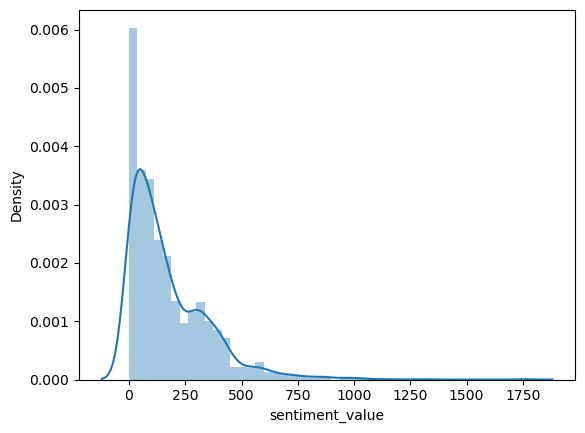

In [74]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

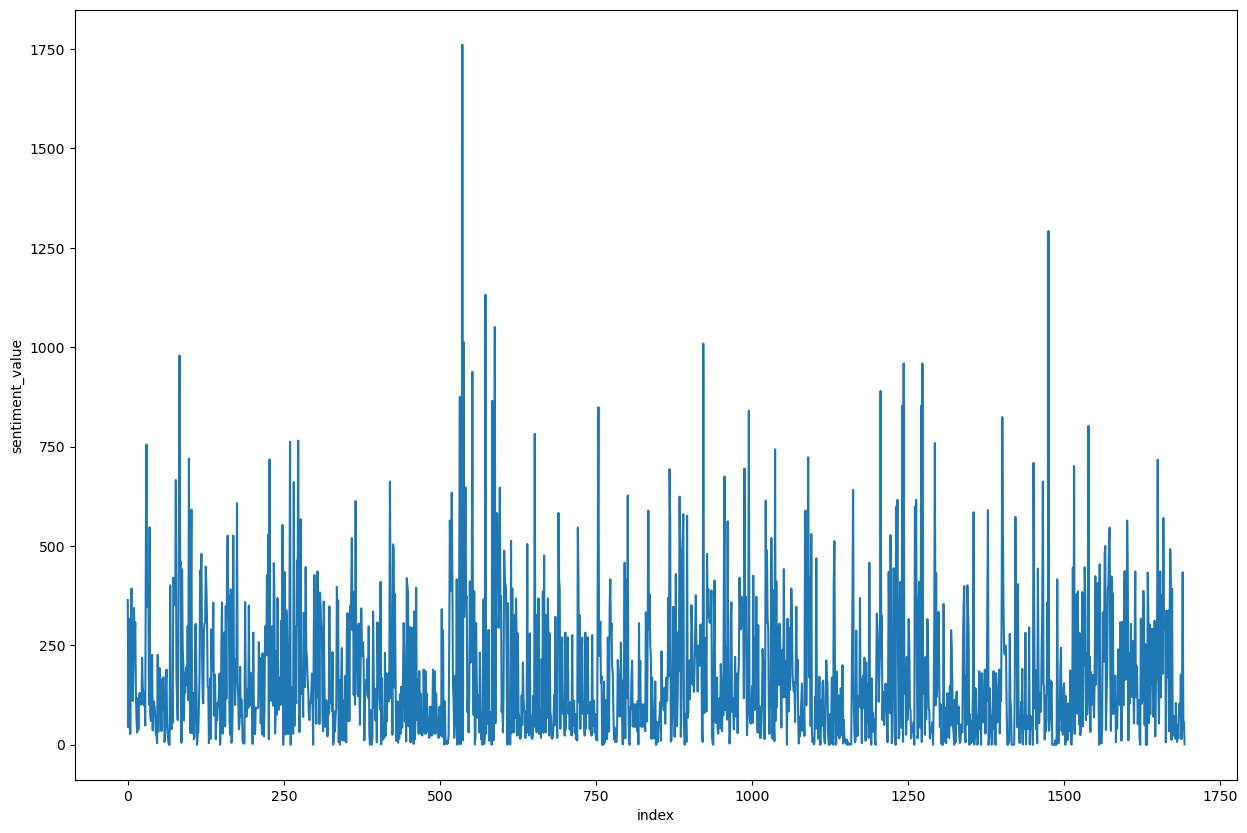

In [75]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

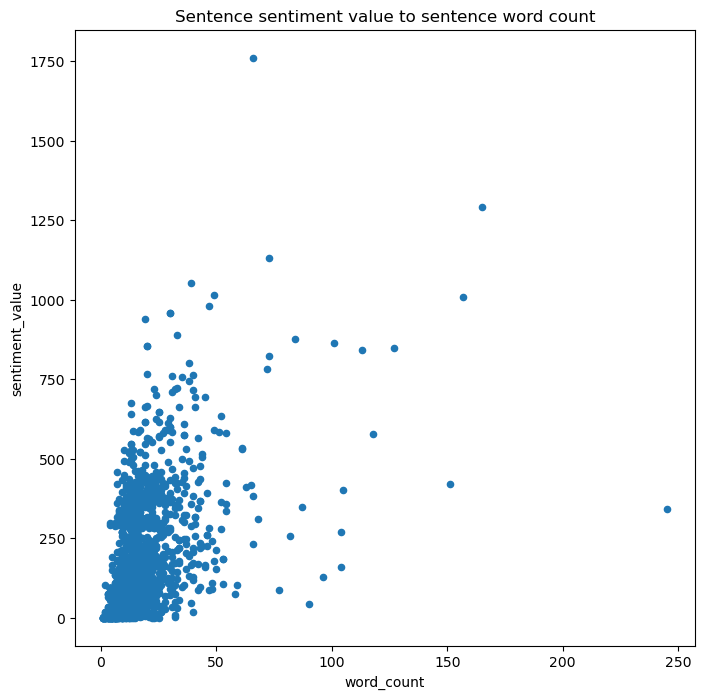

In [76]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

Model Building

In [77]:
# Sample data for demonstration
data = [
    {'Text': 'Sample text from document 1', 'Category': 'hem'},
    {'Text': 'Sample text from document 2', 'Category': 'spam'},
    {'Text': 'Sample text from document 3', 'Category': 'hem'}
]

In [78]:
# Creating a DataFrame
df = pd.DataFrame(data)

In [79]:
# Verify DataFrame structure
print("DataFrame structure:")
print(df.head())
print("Columns in DataFrame:", df.columns)


DataFrame structure:
                          Text Category
0  Sample text from document 1      hem
1  Sample text from document 2     spam
2  Sample text from document 3      hem
Columns in DataFrame: Index(['Text', 'Category'], dtype='object')


In [80]:
import re

# Clean the text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [81]:
df['Text'] = df['Text'].apply(clean_text)


In [82]:
# Tokenization and stop words removal
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [83]:
print("Cleaned text data:")
print(df.head())

Cleaned text data:
                   Text Category
0  sample text document      hem
1  sample text document     spam
2  sample text document      hem


In [84]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Text'])

In [85]:
# Encode labels
y = df['Category'].map({'hem': 0, 'spam': 1})

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [88]:
# Predict
y_pred = model.predict(X_test)

In [89]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [90]:
# NoW lets train the model and print the classification report:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a sample dataset for demonstration
X, y = make_classification(n_samples=10, n_features=5, n_informative=3, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure n_neighbors is less than or equal to the number of training samples
n_neighbors = min(5, X_train.shape[0])

# Initialize the KNeighborsClassifier with adjusted n_neighbors
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Use OneVsRestClassifier with KNeighborsClassifier
clf = OneVsRestClassifier(knn)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(y_pred)

[1 0]


In [91]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5


In [92]:
# Train the model using Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(probability=True)
z=svm_model.fit(X_train, y_train)

In [93]:
# Predict the labels for the test set
ypred = svm_model.predict(X_test)

In [94]:
# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5000


In [95]:
# Print the classification report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Kodati Gangadhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kodati Gangadhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kodati Gangadhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
svm_model


SVC(probability=True)

In [97]:
# prediction system

import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

Model Deployment

In [98]:
%%writefile app.py
import pandas as pd
import numpy as np
import streamlit as st
from io import BytesIO
import pickle
import click
import spacy
import docx2txt
import pdfplumber
from pickle import load
import requests
import re
import os
import sklearn
import PyPDF2
import nltk
import pickle as pk
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from spacy.matcher import Matcher
from sklearn.feature_extraction.text import TfidfVectorizer

# Specify NLTK data path
# nltk_data_path = os.path.join(os.environ['APPDATA'], 'nltk_data')

# Set NLTK data path
# nltk.data.path.append(nltk_data_path)


# Now import and download the necessary NLTK resources
# nltk.download('punkt', download_dir=nltk_data_path)
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('wordnet')
# # nltk.download('stopwords', download_dir=nltk_data_path)
# nltk.download('omw-1.4')

en_stopwords = set(nltk.corpus.stopwords.words('english'))

# en_stopwords = set(stopwords.words('english'))


# FUNCTIONS
def getText(filename):
    # Create empty string 
    fullText = ''
    if filename.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        doc = docx2txt.process(filename)
        for para in doc:
            fullText = fullText + para
    else:  
        with pdfplumber.open(filename) as pdf_file:
            pdoc = PyPDF2.PdfReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
        for paragraph in page_content:
            fullText =  fullText + paragraph
    return fullText


def display(doc_file):
    resume = []
    if doc_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        resume.append(docx2txt.process(doc_file))
    else:
        with pdfplumber.open(doc_file) as pdf:
            pages = pdf.pages[0]
            resume.append(pages.extract_text())
    return resume

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in en_stopwords]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words) 



file_type = pd.DataFrame([], columns=['Uploaded File',  'Predicted Profile'])


filename = []
predicted = []

MAX_FILE_SIZE_MB = 2  # Maximum file size allowed in MB


# Load the trained model and vectorizer
model = pickle.load(open('model.pkl','rb'))
tfidf = pickle.load(open('vectorizer.pkl','rb'))




# Streamlit app

st.title('NLP Model Deployment')
    
MAX_FILE_SIZE_MB = 2  # Maximum file size allowed in MB

upload_file = st.file_uploader('Upload Resume',type=['txt','pdf'],accept_multiple_files=True)



for doc_file in upload_file:
    if doc_file is not None:
        # Check file size
        if len(doc_file.getvalue()) > MAX_FILE_SIZE_MB * 1024 * 1024:
            st.error(f"File '{doc_file.name}' exceeds the maximum size limit of {MAX_FILE_SIZE_MB} MB.")
            continue
        
        filename.append(doc_file.name)
        cleaned = preprocess(display(doc_file))
        prediction = model.predict(tfidf.transform([cleaned]))[0]
        predicted.append(prediction)
        # extText = len(doc_file.pages)

        # extText = getText(doc_file)
        # len(reader.pages) 
        
if len(predicted) > 0:
    # Define a mapping dictionary to map label encoded values to original categories
     label_mapping = {
        0: 'PeopleSoft',
        1: 'React JS Developer',
        2: 'SQL Developer',
        3: 'Workday'
        # Add more mappings as needed
     }

    
    
  
    # Predict and map the labels to their original categories
predicted_categories = [label_mapping[label] for label in predicted]

    # Update the DataFrame with the original category predictions
file_type['Uploaded File'] = filename
file_type['Predicted Profile'] = predicted_categories

    # Display the updated DataFrame
st.table(file_type.style.format())

Overwriting app.py


In [ ]:
!streamlit run app.py

In [ ]:
# # import os
# print(os.getcwd())

In [ ]:
# import os
# print(os.listdir())

In [ ]:
# cd path/to/your/directory


In [ ]:
# !streamlit run app.py